In [1]:
import numpy as np    
import pandas as pd
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.font_manager as fm
from xgboost import XGBClassifier
myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\simsun.ttc') 
myfont_times = fm.FontProperties(fname=r'C:\Windows\Fonts\times.ttf') 

df=pd.read_csv(r"C:\Users\mjdee\Desktop\JI-2020\ML\test(1) and SAPS3 and MEWS.csv")
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [2]:
df['alive']=df.apply(lambda x: 1 if x.ALIVE_7D==0 else 0,axis=1)

In [3]:
#基础分16
df['SAP3']=16

In [4]:
#年龄分
df['SAP3']=df['SAP3']+df.apply(lambda x: 0 if x.AGE<40 else 
                                     (5 if 60>x.AGE>=40 else 
                                     (9 if 70>x.AGE>=60 else 
                                     (13 if 75>x.AGE>=70 else 
                                     (15 if 80>x.AGE>=75 else
                                     (18 if x.AGE>=80 else 0) )))), axis=1)

In [5]:
#入ICU前停留时间均<14天，0分
#入ICU前地点均为急诊室，5分
df['SAP3']=df['SAP3']+5

In [6]:
#肿瘤治疗加3分
df['SAP3']=df['SAP3']+df.apply(lambda x: 3 if x.Cancer_Therapy==1 else 0,axis=1)
#肿瘤加11分
df['SAP3']=df['SAP3']+df.apply(lambda x: 11 if x.DISCH_DX_NEOPLASMS==1 else 0,axis=1)
#血液系统肿瘤加6分
df['SAP3']=df['SAP3']+df.apply(lambda x: 6 if x['Hematologic cancer']==1 else 0,axis=1)
#慢性心力衰竭（NYHA IV）6分
df['SAP3']=df['SAP3']+df.apply(lambda x: 6 if x['chronic heart failureIV']==1 else 0,axis=1)
#肝硬化8分
df['SAP3']=df['SAP3']+df.apply(lambda x: 8 if x['Cirrhosis']==1 else 0,axis=1)
#AIDS 8分
df['SAP3']=df['SAP3']+df.apply(lambda x: 8 if x['DISCH_DX_AIDS']==1 else 0,axis=1)
#血管活性药物3分
df['SAP3']=df['SAP3']+df.apply(lambda x: 3 if x['Use_Vasoactive_Drugs']==1 else 0,axis=1)
#是否在计划内，不在3分
df['SAP3']=df['SAP3']+df.apply(lambda x: 3 if x['Planed_Admit_ERD']==1 else 0,axis=1)
#心律失常 -5分
df['SAP3']=df['SAP3']+df.apply(lambda x: -5 if x['?arrhythmia']==1 else 0,axis=1)
#低血容量出血性休克 3分
df['SAP3']=df['SAP3']+df.apply(lambda x: 3 if x['Hypovolemic_hemorrhagic_shock']==1 else 0,axis=1)
#感染性休克 5分
df['SAP3']=df['SAP3']+df.apply(lambda x: 5 if x['Septic_shock']==1 else 0,axis=1)
#过敏性休克 5分
df['SAP3']=df['SAP3']+df.apply(lambda x: 5 if x['Anaphylactic_shock']==1 else 0,axis=1)
#混合型休克 5分
df['SAP3']=df['SAP3']+df.apply(lambda x: 5 if x['Mix_shoch']==1 else 0,axis=1)
#肝衰竭 6分
df['SAP3']=df['SAP3']+df.apply(lambda x: 6 if x['Live_failure']==1 else 0,axis=1)
#重症胰腺炎 9分
df['SAP3']=df['SAP3']+df.apply(lambda x: 9 if x['SAP']==1 else 0,axis=1)
#急腹症 3分
df['SAP3']=df['SAP3']+df.apply(lambda x: 3 if x['Acute_Abdomen']==1 else 0,axis=1)
#颅内占位效应 10分
df['SAP3']=df['SAP3']+df.apply(lambda x: 10 if x['Intracranial_effect']==1 else 0,axis=1)
#局灶性神经病变 7分
df['SAP3']=df['SAP3']+df.apply(lambda x: 7 if x['Focal_neurologic_deficit']==1 else 0,axis=1)
#癫痫 -4分
df['SAP3']=df['SAP3']+df.apply(lambda x: -4 if x['Seizures']==1 else 0,axis=1)
#昏迷/昏睡/迟钝/易激惹/过度兴奋/谵妄	4分
df['SAP3']=df['SAP3']+df.apply(lambda x: 4 if x['coma']==1 or x['stupor']==1 or x['obtunded']==1 or 
                               x['Agitation']==1 or x['Vigilance disturbance']==1 or x['Confusion']==1 else 0,axis=1)
#手术状态 0分
#手术部位 0分
#院内感染 4分
df['SAP3']=df['SAP3']+df.apply(lambda x: 4 if x['Infection']==1 else 0,axis=1)
#呼吸系统感染 0


In [7]:
#格拉斯哥评分
df['SAP3']=df['SAP3']+df.apply(lambda x: 15 if x.GCS_FIRST<4 else 
                                        (10 if x.GCS_FIRST==5 else 
                                        (7 if  x.GCS_FIRST==6 else 
                                        (2 if  7<=x.GCS_FIRST<=12 else 0))), axis=1)

In [8]:
#总胆红素
df['SAP3']=df['SAP3']+df.apply(lambda x: 0 if x.TBIL<34.2 else 
                                        (4 if 34.2<=x.TBIL<102.6 else 
                                        (5 if  x.TBIL>=102.6 else 0)), axis=1)
#体温0
#肌酐
df['SAP3']=df['SAP3']+df.apply(lambda x: 0 if x['CREATININE_UMOL/L']<106.1 else 
                                        (2 if 106.1<=x['CREATININE_UMOL/L']<176.8 else 
                                        (7 if  176.8<=x['CREATININE_UMOL/L']<309.4 else 
                                        (8 if   309.4<=x['CREATININE_UMOL/L'] else 0))), axis=1)

#心率
df['SAP3']=df['SAP3']+df.apply(lambda x: 0 if x.HR_FIRST<120 else 
                                        (5 if 120<=x.HR_FIRST<160 else 
                                        (7 if  x.HR_FIRST>=160 else 0)), axis=1)

#白细胞
df['SAP3']=df['SAP3']+df.apply(lambda x: 0 if x.WBC<15 else 
                                        (2 if x.WBC>=15 else 0), axis=1)

#pH
df['SAP3']=df['SAP3']+df.apply(lambda x: 3 if x.PH_FIRST<=7.25 else 
                                        (0 if x.PH_FIRST>7.25 else 0), axis=1)

#PLT
df['SAP3']=df['SAP3']+df.apply(lambda x: 13 if x.PLT<=20 else 
                                        (8 if 20<=x.PLT<50 else 
                                        (5 if 50<=x.PLT<100 else 0)), axis=1)

#sbp                
df['SAP3']=df['SAP3']+df.apply(lambda x: 11 if x.SBP_FIRST<40 else 
                                        (8 if 40<=x.SBP_FIRST<70 else 
                                        (3 if 70<=x.SBP_FIRST<120 else 0)), axis=1)
#氧合
df['SAP3']=df['SAP3']+df.apply(lambda x: 11 if (x.PO2_FIRST/x.FiO2_FIRST)<1 and x.O2_DEVICE_FIRST==3 else 
                                         (7 if (x.PO2_FIRST/x.FiO2_FIRST)>=1 and x.O2_DEVICE_FIRST==3 else 
                                         (5 if x.PO2_FIRST<60 and x.O2_DEVICE_FIRST!=3 else 0)), axis=1)

In [9]:
df['logit']=-32.6659+(np.log(df['SAP3']+20.5958)*7.3068)
df['saps_pro']=np.exp(df['logit'])/(1+np.exp(df['logit']))

In [10]:
#收缩压
df['MEWS']=df.apply(lambda x: 3 if x.SBP_FIRST<70 else 
                            ( 2 if 71<=x.SBP_FIRST<80 else 
                            ( 1 if 81<=x.SBP_FIRST<100 else
                            ( 2 if x.SBP_FIRST>200 else 0))), axis=1)
#心率
df['MEWS']=df['MEWS']+df.apply(lambda x: 2 if x.HR_FIRST<40 else 
                                        (1 if 41<=x.HR_FIRST<50 else 
                                        (0 if 50<=x.HR_FIRST<100 else
                                        (1 if 101<=x.HR_FIRST<=110 else
                                        (2 if 111<=x.HR_FIRST<=129 else
                                        (3 if x.HR_FIRST>=130 else 0))))), axis=1)
#呼吸频率
df['MEWS']=df['MEWS']+df.apply(lambda x: 2 if x.RR_FIRST<9 else 
                                        (0 if 9<=x.RR_FIRST<=14 else 
                                        (1 if 15<x.RR_FIRST<20 else
                                        (2 if 21<=x.RR_FIRST<29 else
                                        (3 if x.RR_FIRST>=30 else 0)))), axis=1)

#体温缺失
#AVPU评分The AVPU score was derived from the GCS as follows: A = 14–15, V = 9–13, P = 4–8, U = 3.
#参考文献Comparison of the National Early Warning Score (NEWS) and the Modified Early Warning Score (MEWS) for predicting
#admission and in-hospital mortality in elderly patients in the pre-hospital setting and in the emergency department
df['MEWS']=df['MEWS']+df.apply(lambda x: 3 if x.GCS_FIRST<4 else 
                                        (2 if 4<=x.GCS_FIRST<=8 else 
                                        (1 if 9<=x.GCS_FIRST<14 else 0)), axis=1)

In [11]:
df['DAVROS']=np.power(1.03,df['AGE'])
df['DAVROS']=df['DAVROS']*df.apply(lambda x: 1.06 if x.DISCH_DX_RESP==1 else 1,axis=1)
df['DAVROS']=df['DAVROS']*df.apply(lambda x: 0.56 if x.DISCH_DX_INJURY==1 else 1,axis=1)
df['DAVROS']=df['DAVROS']*df.apply(lambda x: 0.8 if x.DISCH_DX_NEOPLASMS==1 else 1,axis=1)
df['DAVROS']=df['DAVROS']*df.apply(lambda x: 0.06 if x.DISCH_DX_ABNORMAL_NOS==1 else 1,axis=1)
df['DAVROS']=df['DAVROS']*df.apply(lambda x: 3.48 if x.DISCH_DX_CEREBROVASC==1 else 1,axis=1)
df['DAVROS']=df['DAVROS']*df.apply(lambda x: 0.76 if x.DISCH_DX_FLU_PNEUMONIA==1 else 1,axis=1)
df['DAVROS']=df['DAVROS']*df.apply(lambda x: 0.33 if x.DISCH_DX_CHRONIC_LOWER_RESP==1 else 1,axis=1)
df['DAVROS']=df['DAVROS']*df.apply(lambda x: 0.62 if x.DISCH_DX_CIRC_DISEASE==1 else 1,axis=1)
df['DAVROS']=df['DAVROS']*df.apply(lambda x: 0.44 if x.DISCH_DX_DIGESTIVE_DISEASE==1 else 1,axis=1)
df['DAVROS']=df['DAVROS']*df.apply(lambda x: 0.21 if x.DISCH_DX_GU_DISEASE==1 else 1,axis=1)
df['DAVROS']=df['DAVROS']*df.apply(lambda x: 0.12 if x.DISCH_DX_OTHER_DISEASE==1 else 1,axis=1)

df['DAVROS']=df['DAVROS']*df.apply(lambda x: 3.36 if x.ACTIVE_MALIGNANCY==1 else 1,axis=1)
df['DAVROS']=df['DAVROS']*df.apply(lambda x: 1.13 if x.STEROID_THERAPY==1 else 1,axis=1)

df['DAVROS']=df['DAVROS']*df.apply(lambda x: 1 if 3<=x.GCS_FIRST<=8 else 
                                         (0.25 if 9<x.GCS_FIRST<12 else 
                                         (0.1 if  13<=x.GCS_FIRST<=15 else 1)), axis=1)

df['DAVROS']=df['DAVROS']*df.apply(lambda x: 1 if 60<=x.HR_FIRST<=99 else 
                                         (1.21 if 100<=x.HR_FIRST<=130 else 
                                         (1.34 if  0<=x.HR_FIRST<=59 else
                                         (2.04 if  131<=x.HR_FIRST<=99 else 1))), axis=1)

df['DAVROS']=df['DAVROS']*df.apply(lambda x: 1 if 10<=x.RR_FIRST<=25 else 
                                         (5.05 if 0<x.RR_FIRST<9 else 
                                         (1.94 if  26<=x.RR_FIRST<=99 else 1)), axis=1)

df['DAVROS']=df['DAVROS']*df.apply(lambda x: 1 if 120<=x.SBP_FIRST<=180 else 
                                         (1.44 if 100<=x.SBP_FIRST<=119 else 
                                         (1.34 if 181<=x.SBP_FIRST<=999 else
                                         (1.58 if 0<=x.SBP_FIRST<=99 else 1))), axis=1)

df['DAVROS']=df['DAVROS']*df.apply(lambda x: 1 if 99<=x.SpO2_FIRST<=100 else 
                                         (1.05 if 94<=x.SBP_FIRST<=98 else 
                                         (2.06 if 0<=x.SBP_FIRST<=93 else 1)), axis=1)

df['DAVROS']=df['DAVROS']*df.apply(lambda x: 0.97 if 171<=x.HGB<=999 else 
                                            (1.91 if 0<=x.HGB<=89 else 1), axis=1)


df['DAVROS']=df['DAVROS']*df.apply(lambda x: 1.90 if 14.1<=x.WBC<=20 else 
                                            (3.10 if 0<=x.WBC<=4.4 else 
                                            (1.46 if 20.1<=x.WBC<999 else 1)), axis=1)

df['DAVROS']=df['DAVROS']*df.apply(lambda x: 0.91 if 401<=x.PLT<=999 else 
                                            (1.72 if 0<=x.PLT<=149 else 1), axis=1)

df['DAVROS']=df['DAVROS']*df.apply(lambda x: 0.66 if 148<=x.SODIUM<=999 else 
                                            (1.04 if 0<=x.SODIUM<=134 else 1), axis=1)

df['DAVROS']=df['DAVROS']*df.apply(lambda x: 1.82 if 5.1<=x.POTASSIUM<=999 else 
                                            (3.03 if 0<=x.POTASSIUM<=3.4 else 1), axis=1)

df['DAVROS']=df['DAVROS']*df.apply(lambda x: 1.66 if 43<=x['BUN_MMOL/L']<=84 else 
                                            (2.37 if 85<=x['BUN_MMOL/L']<=199 else 1), axis=1)

df['DAVROS']=df['DAVROS']*df.apply(lambda x: 1.62 if 1.25<=(x['CREATININE_UMOL/L']/88.4)<=2.03 else 
                                            (2.12 if 0<=(x['CREATININE_UMOL/L']/88.4)<=0.61 else
                                            (1.96 if 2.04<=(x['CREATININE_UMOL/L']/88.4)<=999 else 1)), axis=1)

df['DAVROS']=df['DAVROS']*df.apply(lambda x: 1.46 if 0<=(x.GLUCOSE*18)<=71 else 
                                            (1.07 if 109<=(x.GLUCOSE*18)<=180 else
                                             1.32 if 181<=(x.GLUCOSE*18)<=999 else 1), axis=1)


df['darlog']=df['DAVROS']+0.0009541
df['PredictedDAVROS']=df['darlog']/(df['darlog']+1)

In [12]:
df.head()

,AGE,chest pain,abdominal pain,Chest tightness,dyspnea,fever,syncope,fatigue,palpitation,Hematemesis,Bloody stools,Altered mental status,headache,vomiting,TRAUMA_YN,DISCH_DX_RESP,DISCH_DX_INJURY,DISCH_DX_NEOPLASMS,Cancer_Therapy,ACTIVE_MALIGNANCY,Hematologic cancer,Metastatic cancer,DISCH_DX_ABNORMAL_NOS,DISCH_DX_CEREBROVASC,DISCH_DX_FLU_PNEUMONIA,DISCH_DX_CHRONIC_LOWER_RESP,DISCH_DX_CIRC_DISEASE,chronic heart failureIV,DISCH_DX_DIGESTIVE_DISEASE,Cirrhosis,DISCH_DX_GU_DISEASE,DISCH_DX_OTHER_DISEASE,STEROID_THERAPY,DISCH_DX_AIDS,Infection,Use_Vasoactive_Drugs,Planed_Admit_ERD,?arrhythmia,Hypovolemic_hemorrhagic_shock,Hypovolemic_non-hemorrhagic_shock,Septic_shock,Anaphylactic_shock,Mix_shoch,Live_failure,Seizures,coma,stupor,obtunded,Agitation,Vigilance disturbance,Confusion,Focal_neurologic_deficit,Intracranial_effect,Acute_Abdomen,SAP,GCS_FIRST,RR_FIRST,HR_FIRST,SBP_FIRST,SpO2_FIRST,FiO2_FIRST,O2_DEVICE_FIRST,O2_FLOW_RATE_FIRST,PH_FIRST,PO2_FIRST,WBC,CREATININE_UMOL/L,POTASSIUM,SODIUM,BUN_MMOL/L,GLUCOSE,HGB,PLT,TBIL,xiuke_first,ALIVE_7D,alive,SAP3,logit,saps_pro,MEWS,DAVROS,darlog,PredictedDAVROS
0,78,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,44,120,116,99.0,41,0,5,7.28,67,15.52,420.0,3.20,138.0,13.3,5.88,134.0,187.0,23.6,1.034483,0,1,62,-0.413986,0.397957,5,10.436378,10.437332,0.912567
1,66,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,27,89,154,100.0,29,0,2,7.23,106,11.21,47.0,2.88,144.5,3.6,11.03,136.0,140.0,32.3,0.577922,0,1,38,-2.922379,0.051058,3,3.702136,3.703090,0.787374
2,51,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,15,20,89,170,99.0,29,0,2,7.47,119,11.48,61.0,4.16,143.9,3.7,10.90,140.0,290.0,12.4,0.523529,1,0,33,-3.574090,0.027276,0,2.074205,2.075159,0.674814
3,72,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,20,76,107,100.0,2,0,2,7.40,80,7.62,69.0,4.24,150.0,4.2,8.81,89.0,324.0,17.9,0.710280,1,0,40,-2.677145,0.064336,0,0.445090,0.446044,0.308458
4,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,22,82,147,98.0,29,0,2,7.40,94,9.60,73.0,4.19,136.6,7.5,8.81,41.0,231.0,1.7,0.557823,1,0,36,-3.176132,0.040074,2,0.850157,0.851111,0.459784


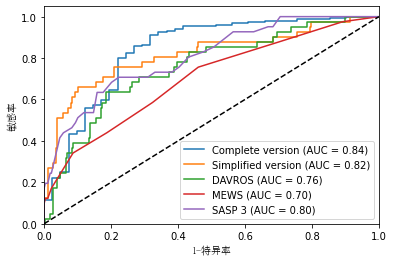

In [13]:
bysy=pd.read_csv(r"C:\Users\mjdee\Desktop\JI-2020\ML\test(1) and SAPS3 and MEWS.csv")
train=bysy.values
g=train.shape[1]

X_train=train[:1281, :g-1]
y_train=train[:1281,g-1]

X_test=train[1281:, :g-1]
y_test=train[1281:,g-1] 

#XGboost
model=XGBClassifier(subsample=1,eta=0.05,eval_metric=['logloss','auc','error'],use_label_encoder=False)
model.fit(X_train,y_train)
y_prob_xgboost = model.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc1 = roc_auc_score(y_test,model.predict_proba(X_test)[:,1])


#SAPS
df_test=df.iloc[1281:,]
y_test_saps=df_test['alive']
sasp3_pro=df_test['saps_pro']
fpr, tpr, thresholds = metrics.roc_curve(y_test_saps,sasp3_pro)
auc = roc_auc_score(y_test_saps,sasp3_pro)

#MEWS
mews_pro=df_test['MEWS']
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test_saps,mews_pro)
auc2=roc_auc_score(y_test_saps,mews_pro)

#DAVROS
DAVROS=df_test['PredictedDAVROS']
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test_saps,DAVROS)
auc3=roc_auc_score(y_test_saps,DAVROS)


#simple
simple=pd.read_csv(r"C:\Users\mjdee\Desktop\JI-2020\ML\PUTH_SIMPLE.CSV")
train_simple=simple.values
x=train_simple.shape[1]

X_train_simple=train_simple[:1281, :x-1]
y_train_simple=train_simple[:1281,x-1]

X_test_simple=train_simple[1281:, :x-1]
y_test_simple=train_simple[1281:,x-1] 

model=XGBClassifier(subsample=1,eta=0.05,eval_metric=['logloss','auc','error'],use_label_encoder=False)
model.fit(X_train_simple,y_train_simple)
y_prob_simple = model.predict_proba(X_test_simple)[:, 1]
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test_simple, model.predict_proba(X_test_simple)[:, 1])
auc4 = roc_auc_score(y_test_simple,model.predict_proba(X_test_simple)[:, 1])


plt.plot(fpr1, tpr1,label='%s (AUC = %0.2f)' % ('Complete version', auc1))
plt.plot(fpr4, tpr4,label='%s (AUC = %0.2f)' % ('Simplified version', auc4))
plt.plot(fpr3, tpr3,label='%s (AUC = %0.2f)' % ('DAVROS', auc3))
plt.plot(fpr2, tpr2,label='%s (AUC = %0.2f)' % ('MEWS', auc2))
plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % ('SASP 3', auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-特异率',fontproperties=myfont)
plt.ylabel('敏感率',fontproperties=myfont)
plt.legend(loc="lower right")
plt.savefig(r"C:\Users\mjdee\Desktop\JI-2020\ML\the_roc_sasp3.jpg", bbox_inches='tight',dpi=600)

In [14]:
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []
rng = np.random.RandomState(rng_seed)
yy_pred=np.array(y_prob_simple)
for i in range(n_bootstraps):
    indices = rng.randint(0, len(yy_pred), len(yy_pred))  
    if len(np.unique(y_test[indices])) < 2:
        continue
    score = roc_auc_score(y_test[indices], yy_pred[indices])
    bootstrapped_scores.append(score)
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.2f} - {:0.2}]".format(confidence_lower, confidence_upper))

Confidence interval for the score: [0.12 - 0.25]
